# Warm-up

- what is KNN? How does it works? How is it evaluated?

K Nearest Neighbors machine learning algorothim
Its simple and powerfull model. Its simple because it doesnot need to learn any parameters to make predictions.
Its powerfull because it csn be used in both regression and classification tasks.
KNN algorthim prediction for new data point are made by looking at this neighbors.
How KNN works?
To make prediction of new data point we first need to find its K closest neighbors from the data set.to find which data points are the closest neighbors we need to meassure the distance between the new data point and all existing midpoints.Then we could use the closet neighbors to predict the outcome.
If its regression task we'll take the average of all its closet neighbors value and that will be the prediction.
if its classification task the prediction will be the majority of the class of its neigbors.



- write  lambda that takes the following list and returns only the odd values in it.

In [39]:
my_list = [1,2,3,4,5,6,7,8,9,10]
odd_num = list(filter(lambda x: x%2 != 0, my_list))
print(odd_num)


TypeError: 'list' object is not callable

# Group activity

1. Work to improve the model performance for the diabetes decision tree we created in
class. You should be able to improve the precision and recall to be above .8 and .7
respectively. You can improve the preprocessing OR alter the model itself.


In [3]:
import pandas as pd
from sklearn import tree 
from sklearn.metrics import classification_report, plot_confusion_matrix
import pydotplus
from IPython.display import Image
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42,stratify=y)

#Strandardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [64]:
oversample = SMOTE(random_state = 42)
X_train,y_train = oversample.fit_resample(X_train,y_train)

In [65]:
model = tree.DecisionTreeClassifier(max_depth = 8,random_state=42,min_samples_split=50,)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=50, random_state=42)

In [66]:
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [67]:
diabetes_pred_df = pd.DataFrame(X_test,columns = diabetes_df.columns[0:8])
diabetes_pred_df['Actual_Outcomes'] = y_test.tolist()
diabetes_pred_df['Predicted_Outcome'] = y_pred.tolist()
diabetes_pred_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Actual_Outcomes,Predicted_Outcome
0,-0.221984,0.272956,0.447996,0.127870,-0.030188,-0.405204,-0.400956,0.127104,1,1
1,0.071035,-0.353989,-0.250230,1.368465,0.124779,0.389718,1.411352,-0.559703,1,0
2,2.122167,0.661064,1.245970,0.718629,0.488952,0.613290,-0.615817,1.586570,1,1
3,0.071035,0.690919,0.647490,0.659553,-0.642309,0.849282,0.318362,0.384657,1,1
4,1.243110,-0.473407,1.545210,0.895857,-0.642309,1.445473,-0.662526,1.071464,1,0
...,...,...,...,...,...,...,...,...,...,...
226,-0.515003,0.631210,0.647490,-0.167510,-0.146414,-0.864768,0.962946,-0.988958,0,0
227,0.364054,0.780482,0.298376,-1.230877,-0.642309,-0.218894,-0.055309,-0.388002,0,1
228,2.708205,-0.443553,0.148756,1.959224,-0.642309,0.613290,-0.852475,1.071464,0,0
229,-0.515003,1.108882,1.046476,-1.230877,-0.642309,-0.007743,1.099959,2.874334,1,1


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       150
           1       0.70      0.81      0.75        81

    accuracy                           0.81       231
   macro avg       0.80      0.81      0.80       231
weighted avg       0.82      0.81      0.82       231



In [43]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 0.29
|   |--- feature_7 <= -0.37
|   |   |--- feature_5 <= 1.70
|   |   |   |--- feature_6 <= 0.04
|   |   |   |   |--- feature_0 <= 1.08
|   |   |   |   |   |--- feature_0 <= -1.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  -1.01
|   |   |   |   |   |   |--- feature_3 <= 0.59
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  0.59
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  1.08
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  0.04
|   |   |   |   |--- feature_5 <= -0.01
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  -0.01
|   |   |   |   |   |--- class: 0
|   |   |--- feature_5 >  1.70
|   |   |   |--- class: 1
|   |--- feature_7 >  -0.37
|   |   |--- feature_5 <= -0.68
|   |   |   |--- class: 0
|   |   |--- feature_5 >  -0.68
|   |   |   |--- feature_1 <= -0.85
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.85
|   |  

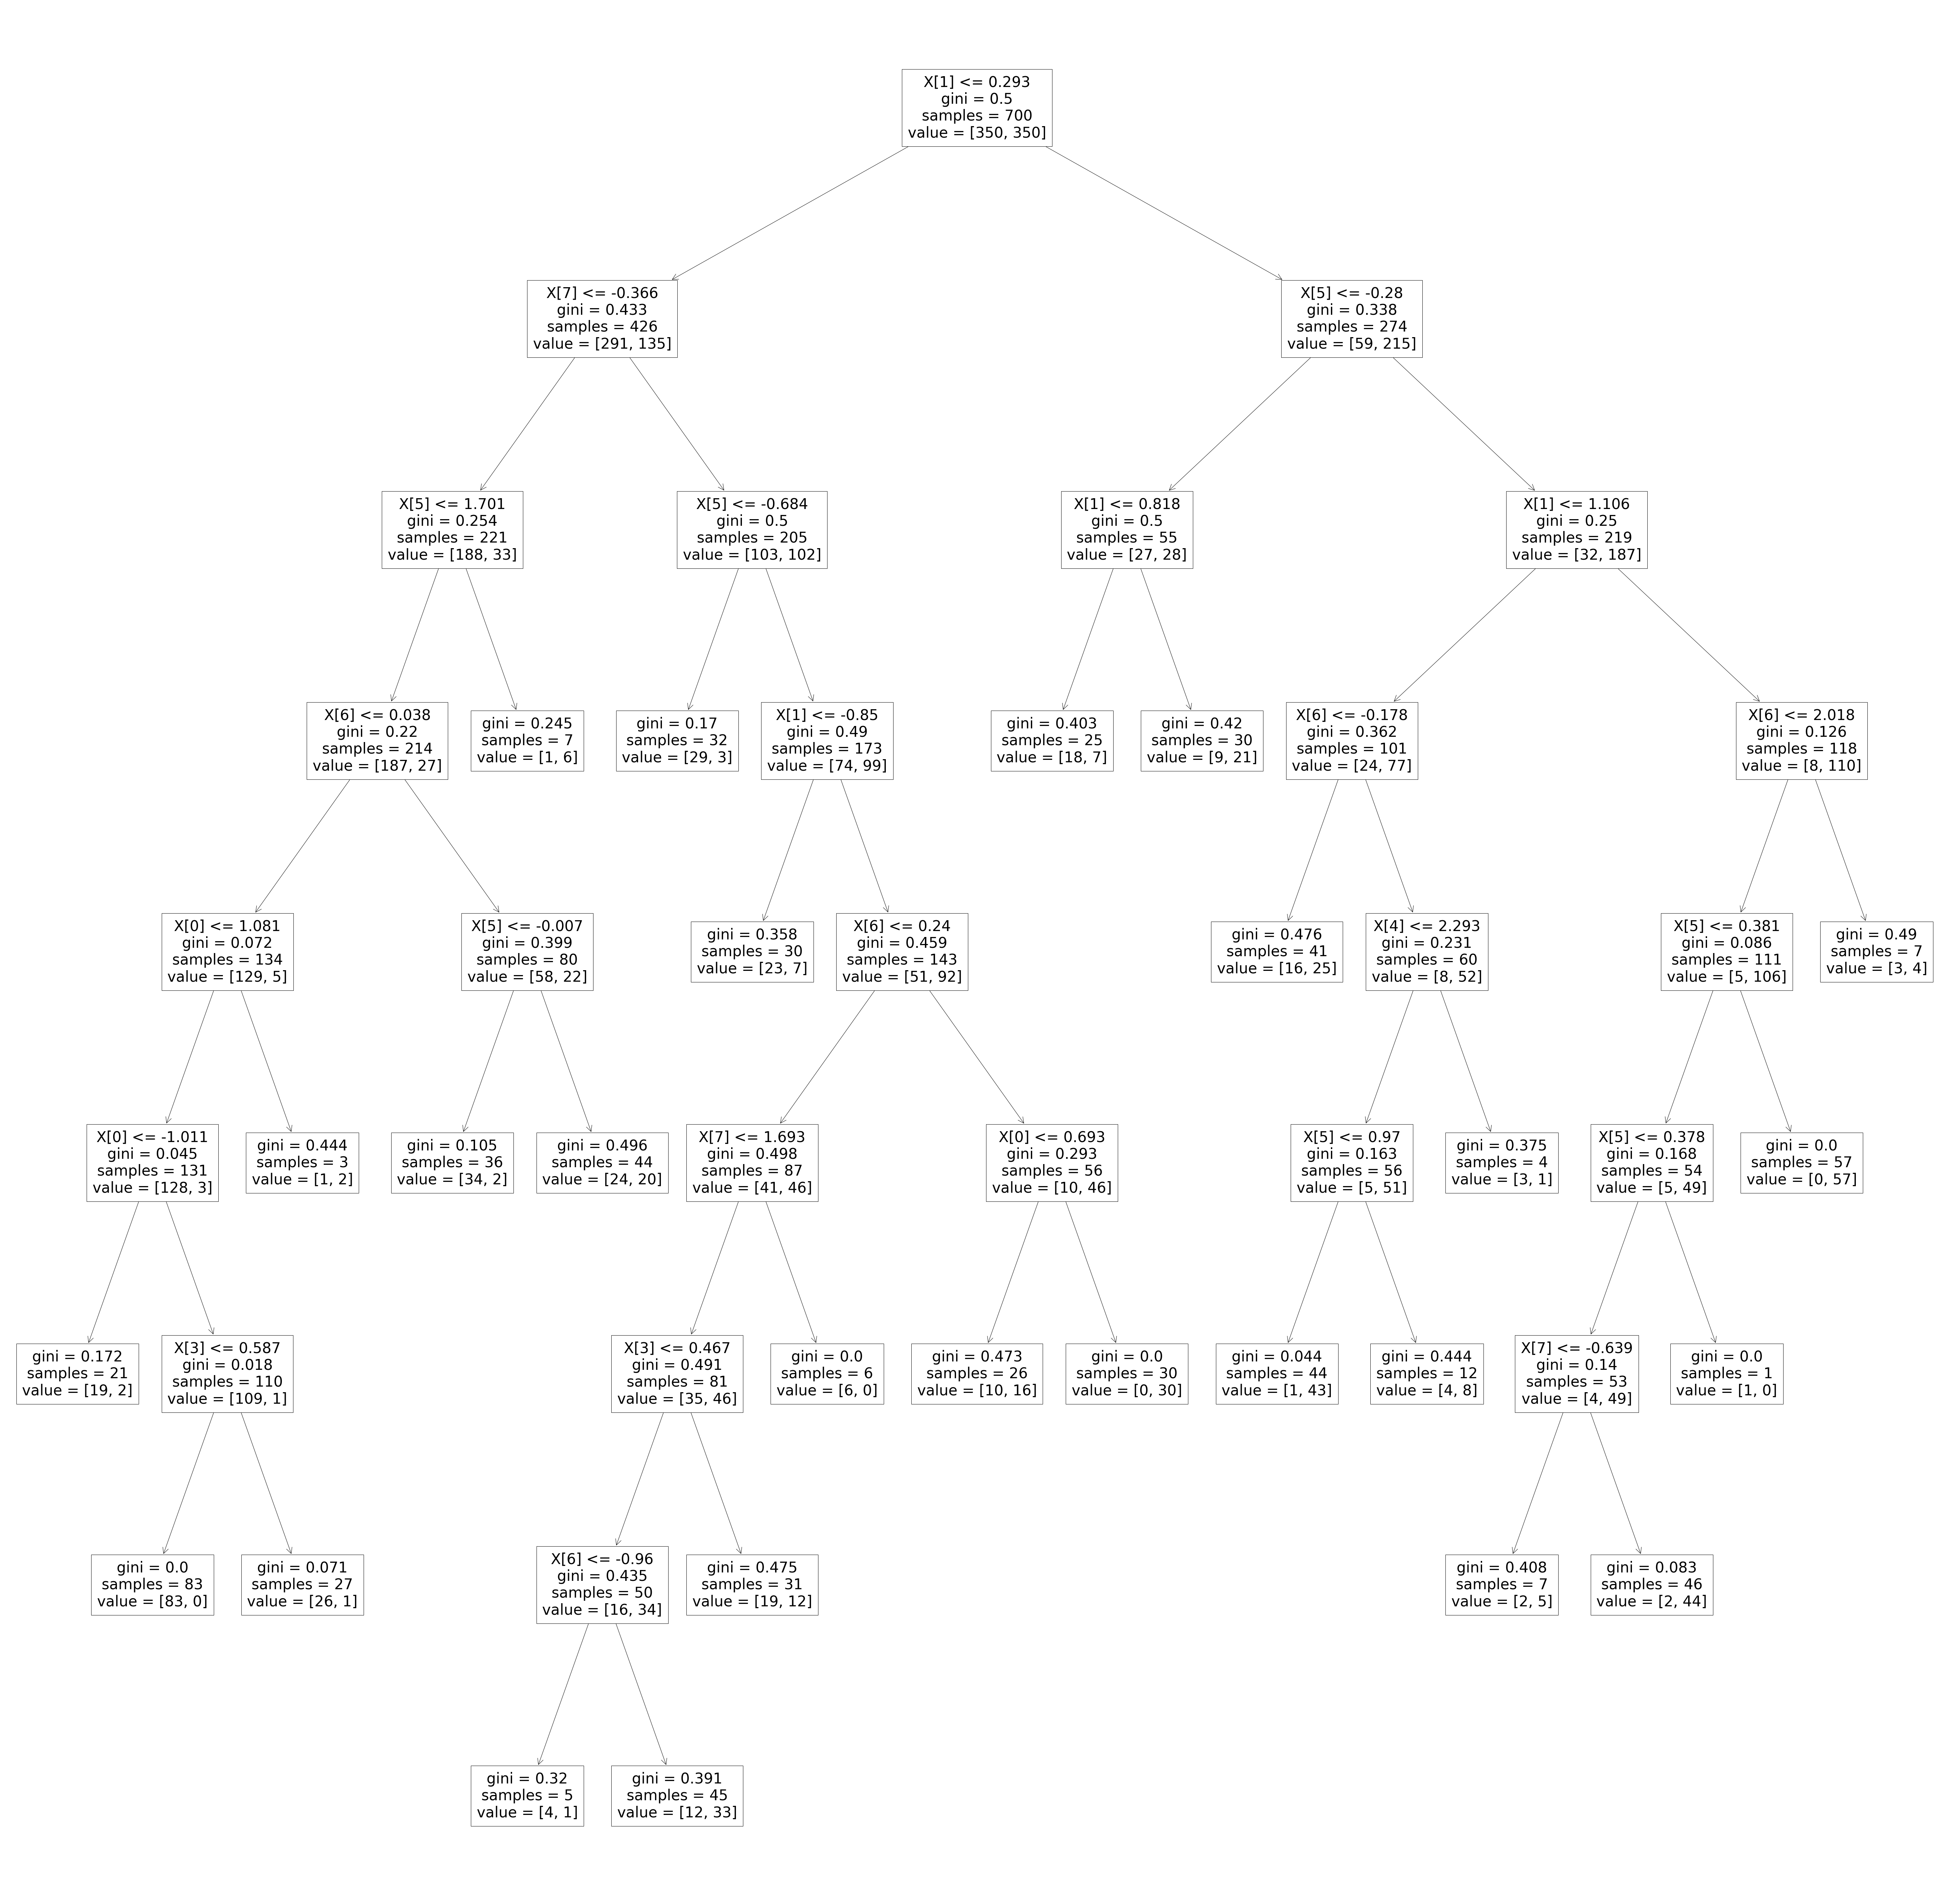

In [50]:
fig, ax = plt.subplots(figsize=(100, 100))
tree.plot_tree(model, ax=ax)
plt.show()

2. Create a function that accepts an array of names and returns a string formatted as a list
of names separated by commas EXCEPT for the last two names, which are separated
by an ampersand (and sign - &)
Example input:
[ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ]
Example output:
Nichole, Tanisha & Maggie

In [113]:
def array_to_string(arr):
    string = ''
    for i in range(len(arr)):
        #if i is equel the the length of the array - 1, need to use&before the last name
        if i == len(arr) - 1:
            string = string+' & ' + arr[i]['name']
        elif i == len(arr) - 2: # nearing the end
            string = string + arr[i]['name']
        else:
            string = string + arr[i]['name'] + ', '
    print(string)
        
array_in = ([ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ])
array_to_string(array_in)    

Nichole, Tanisha & Maggie
